In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_dir = 'dataset/Training'
test_dir = 'dataset/Testing'

In [3]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('model/brain_tumor_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
90/90 [==============================] - 120s 1s/step - loss: 1.1993 - accuracy: 0.4571 - val_loss: 1.5657 - val_accuracy: 0.4086
Epoch 2/20


c:\Users\Admin\OneDrive\Desktop\BrainTumorDetection\venv310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 88s 974ms/step - loss: 0.9240 - accuracy: 0.5965 - val_loss: 2.0322 - val_accuracy: 0.3401
Epoch 3/20
90/90 [==============================] - 96s 1s/step - loss: 0.7990 - accuracy: 0.6585 - val_loss: 1.8214 - val_accuracy: 0.4112
Epoch 4/20
90/90 [==============================] - 106s 1s/step - loss: 0.7037 - accuracy: 0.6997 - val_loss: 2.4208 - val_accuracy: 0.4112
Epoch 5/20
90/90 [==============================] - 97s 1s/step - loss: 0.6666 - accuracy: 0.7132 - val_loss: 2.4827 - val_accuracy: 0.4061
Epoch 6/20
90/90 [==============================] - 98s 1s/step - loss: 0.5964 - accuracy: 0.7561 - val_loss: 2.3020 - val_accuracy: 0.4391


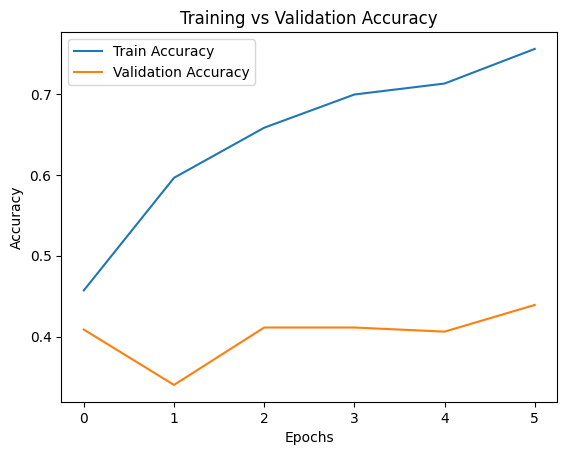

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

13/13 [==============================] - 3s 192ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.78      0.14      0.24       100
meningioma_tumor       0.56      0.12      0.20       115
        no_tumor       0.34      0.97      0.50       105
 pituitary_tumor       0.83      0.58      0.68        74

        accuracy                           0.44       394
       macro avg       0.63      0.45      0.41       394
    weighted avg       0.61      0.44      0.38       394



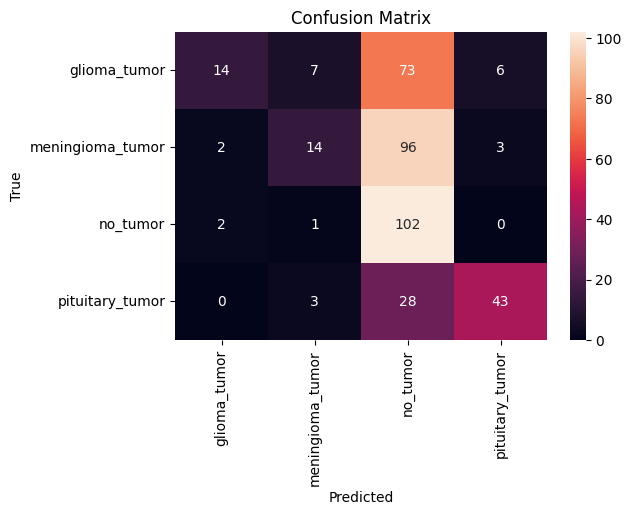

In [7]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes

# Classification Report
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
model.save("model/brain_tumor_model.h5")

c:\Users\Admin\OneDrive\Desktop\BrainTumorDetection\venv310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from tensorflow.keras.models import load_model
model = load_model("model/brain_tumor_model.h5")